# Введение


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

skills_df = pd.read_csv('job_skills.csv')
postings = pd.read_csv('linkedin_job_postings.csv')

In [3]:
skills_df.sample(10)

,job_link,job_skills
933643,https://www.linkedin.com/jobs/view/assistant-p...,"Allergy/Immunology, Clinical Research, Spirome..."
299496,https://www.linkedin.com/jobs/view/tax-manager...,"Tax Management, CPA, 815 years of Experience, ..."
633976,https://www.linkedin.com/jobs/view/gastroenter...,"ERCP, EUS, DEA, BC, Malpractice insurance, Onl..."
223257,https://www.linkedin.com/jobs/view/medical-sur...,"Registered Nurse, Medical/Surgical Tele, Criti..."
1018747,https://ca.linkedin.com/jobs/view/assistant-ma...,"Customer service skills, Planning and organizi..."
712716,https://www.linkedin.com/jobs/view/dentist-%E2...,"Dentistry, Dental Service Organization (DSO), ..."
413059,https://www.linkedin.com/jobs/view/retina-opht...,"Retina Surgery, Ophthalmology, Medical Patient..."
984998,https://ca.linkedin.com/jobs/view/registered-n...,"Nursing, Oncology, Patient assessment, Care pl..."
772731,https://www.linkedin.com/jobs/view/district-as...,"Retail Asset Protection, District Management, ..."
596223,https://www.linkedin.com/jobs/view/staff-tax-a...,"Taxation, Financial Reporting, Internal Contro..."


In [4]:
postings.sample(10)

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
127633,https://www.linkedin.com/jobs/view/mcrt-team-l...,2024-01-19 20:07:03.641377+00,t,t,f,MCRT Team Lead LCSW LMFT LPCC - Mental Health...,Telecare Corporation,"Ceres, CA",2024-01-16,Modesto,United States,Psychiatric Technician,Mid senior,Onsite
976942,https://www.linkedin.com/jobs/view/lpnt-west-t...,2024-01-20 14:21:05.721827+00,t,t,f,LPNT West Travel: RN Rehab (7a-7p) Ottumwa Reg...,TravelNurseSource,"Cedar Rapids, IA",2024-01-13,Amana Colonies,United States,Recreational Therapist,Mid senior,Onsite
741751,https://www.linkedin.com/jobs/view/registered-...,2024-01-19 09:45:09.215838+00,t,t,f,Registered Nurse - Case Management,Capleo Global,"Tacoma, WA",2024-01-13,Summit,United States,Nurse Consultant,Mid senior,Onsite
8982,https://www.linkedin.com/jobs/view/social-work...,2024-01-19 09:45:09.215838+00,f,f,f,Social Worker/ Mental Health Counselor,Tree of Life Counseling Center,"Freehold, NJ",2024-01-17,Bound Brook,United States,Warm-In Worker,Mid senior,Onsite
1167788,https://www.linkedin.com/jobs/view/conductor-e...,2024-01-20 13:05:54.720815+00,t,t,f,Conductor:Entrega a Domicilio - MT,AutoZone,"East Greenbush, NY",2024-01-15,Hudson,United States,Conductor,Mid senior,Onsite
625924,https://www.linkedin.com/jobs/view/contracts-l...,2024-01-19 09:45:09.215838+00,t,t,f,Contracts Lifecycle Management (CLM) Solutions...,PwC,"Kansas City, MO",2024-01-13,Leavenworth,United States,Contract Administrator,Mid senior,Onsite
578383,https://uk.linkedin.com/jobs/view/data-cabling...,2024-01-19 09:45:09.215838+00,t,t,f,Data Cabling Engineer,Digital Waffle,"Edinburgh, Scotland, United Kingdom",2024-01-13,Edinburgh,United Kingdom,Data Communications Analyst,Mid senior,Onsite
1332895,https://www.linkedin.com/jobs/view/veterinaria...,2024-01-21 08:17:46.994616+00,t,t,f,"Veterinarian - Exceptional Opportunity, Superi...",Desort,"McKinney, TX",2024-01-14,Garland,United States,Veterinarian,Associate,Onsite
175476,https://www.linkedin.com/jobs/view/senior-lead...,2024-01-20 00:30:57.333017+00,t,t,f,Senior Lead Space Payload Systems Engineer (St...,Northrop Grumman,"Linthicum, MD",2024-01-16,Catonsville,United States,Electro-Optical Engineer,Mid senior,Onsite
1304240,https://uk.linkedin.com/jobs/view/principal-ge...,2024-01-21 06:26:01.01383+00,t,t,f,Principal Geotechnical Engineer,Conrad Consulting Ltd,"Leeds, England, United Kingdom",2024-01-14,Doncaster,United Kingdom,Bridge Inspector,Mid senior,Onsite


Text(0.5, 1.0, 'Страны, в которых ищут работу')

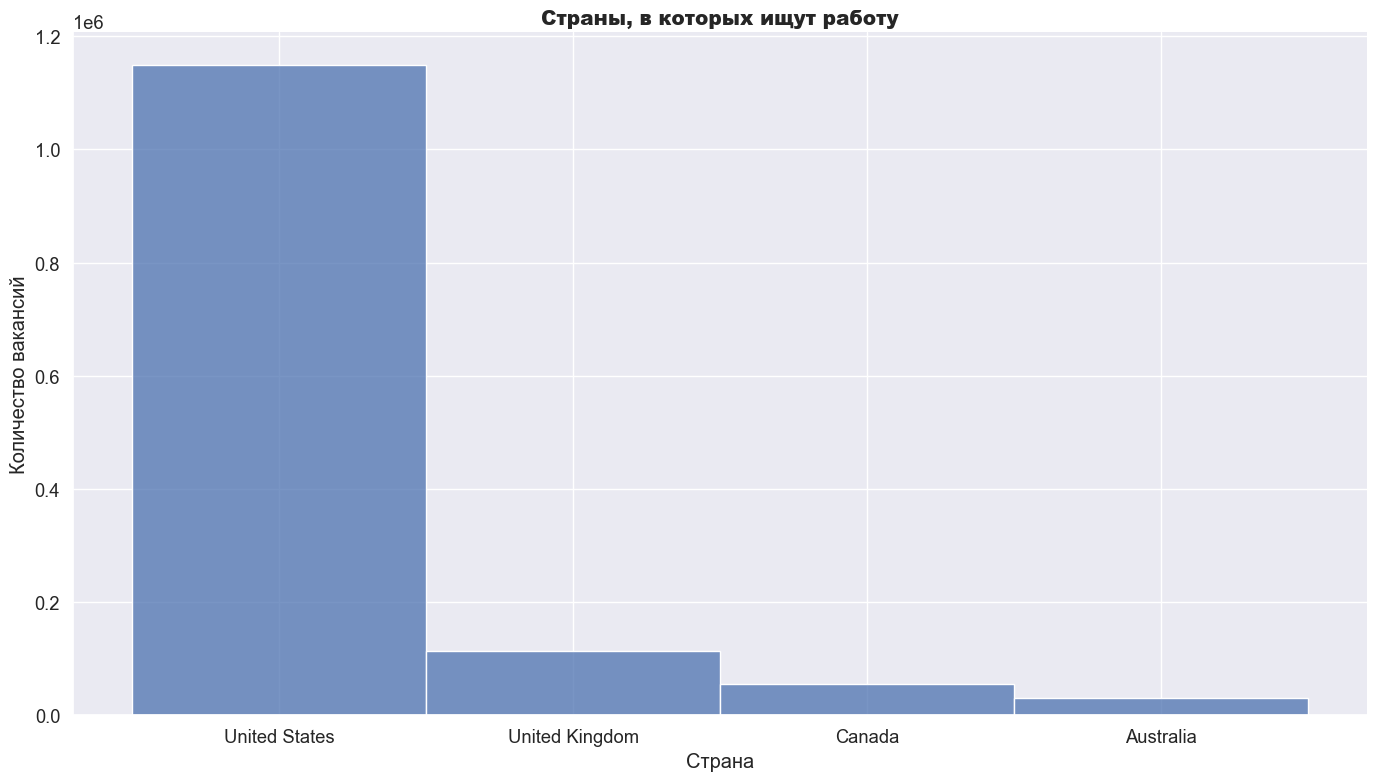

In [43]:
sns.set(font_scale=1.2)
sns.displot(data=postings, x="search_country", height=8, aspect = 1.75)
plt.xlabel("Страна")
plt.ylabel("Количество вакансий")
plt.title("Страны, в которых ищут работу", weight="heavy")

Видим только 4 страны.
Теперь рассмотрим по типу работы:

Text(0.5, 1.0, 'Возможные типы работ')

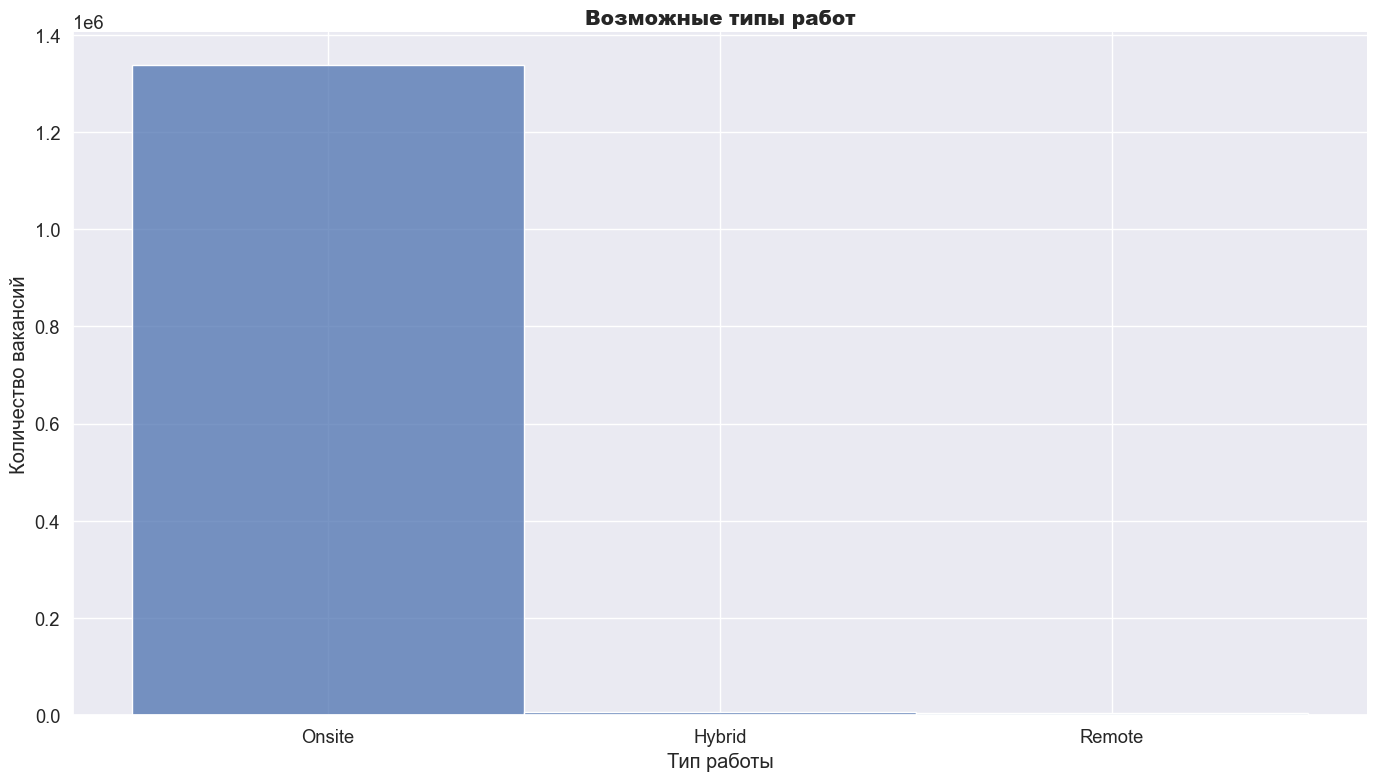

In [44]:
sns.displot(data=postings, x="job_type", height = 8, aspect = 1.75)
plt.xlabel("Тип работы")
plt.ylabel("Количество вакансий")
plt.title("Возможные типы работ", weight="heavy")

Сравним кол-во гибридных и удаленных вакансий

Text(0.5, 1.0, 'Сравнение гибридных и удаленных вакансий')

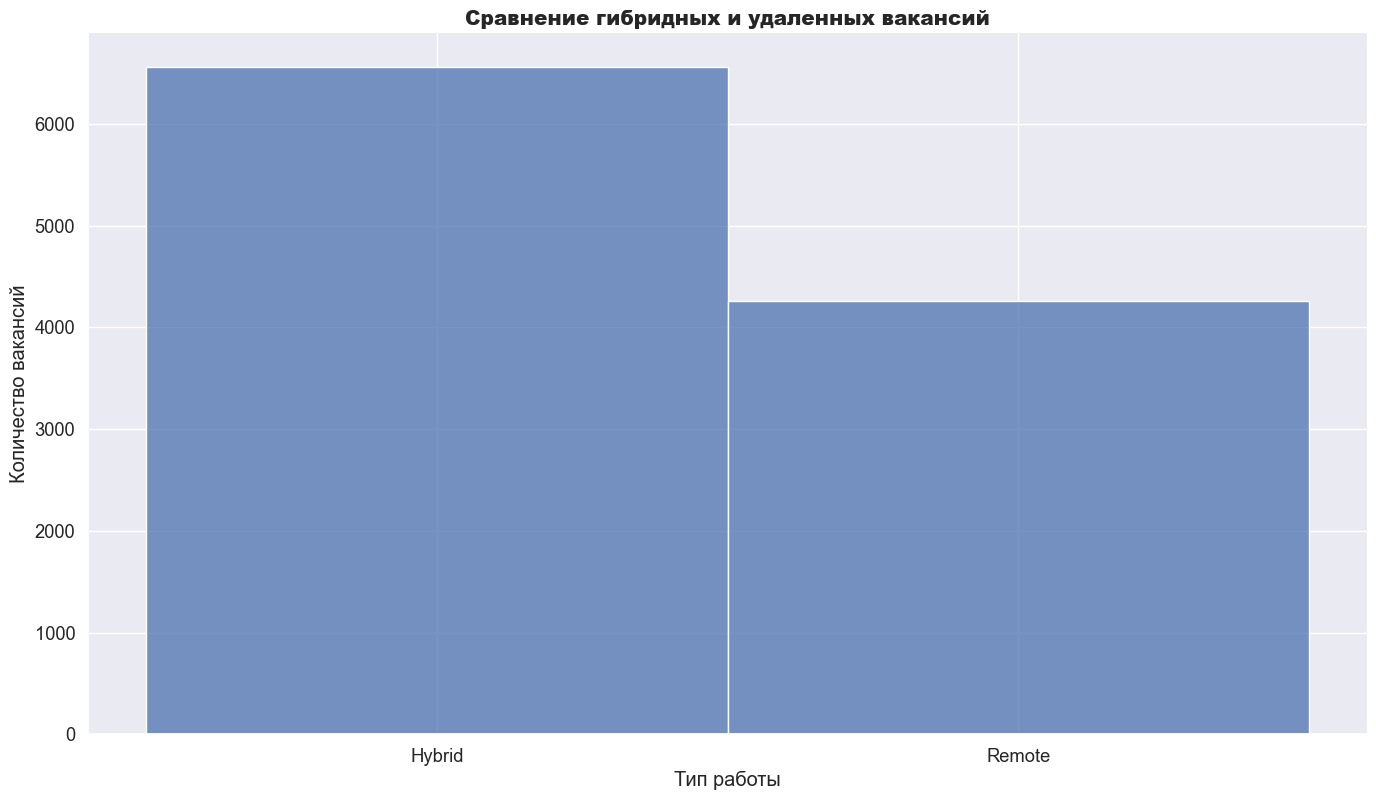

In [45]:
postings_1 = postings.loc[postings['job_type'].isin(['Hybrid','Remote'])]

sns.displot(data=postings_1, x="job_type", height = 8, aspect = 1.75)
plt.xlabel("Тип работы")
plt.ylabel("Количество вакансий")
plt.title("Сравнение гибридных и удаленных вакансий", weight="heavy")

In [8]:
postings_1 = postings.loc[postings['search_country'] == 'United States']
us = len(postings_1[postings['job_type']=='Remote']) / len(postings_1)
postings_1 = postings.loc[postings['search_country'] == 'United Kingdom']
uk = len(postings_1[postings['job_type']=='Remote']) / len(postings_1)
postings_1 = postings.loc[postings['search_country'] == 'Canada']
cnd = len(postings_1[postings['job_type']=='Remote']) / len(postings_1)
postings_1 = postings.loc[postings['search_country'] == 'Australia']
aus = len(postings_1[postings['job_type']=='Remote']) / len(postings_1)
print(us, uk, cnd, aus)

0.003167029482956335 0.0028037135980109504 0.0036625455584935324 0.0032302567381136647


Посмотрим какие компании выставили больше всех вакансий

In [9]:
postings.value_counts('company')

company
Health eCareers                         41598
Jobs for Humanity                       27680
TravelNurseSource                       16142
Dollar General                          14815
PracticeLink                             9738
                                        ...  
$100B+ Alternative Asset Manager            1
MEICON GROUP                                1
👔 Shaffer Dry Cleaning & Laundry            1
👠 Cinderellas Cleaning Service Ltd 👠        1
$50 Million Manufacturing Company           1
Name: count, Length: 90605, dtype: int64

# Ваня


In [10]:
def linkloc(df1, df2):
  df3 = df2.loc[df2['job_link'].isin(df1['job_link'].tolist())]
  return df3

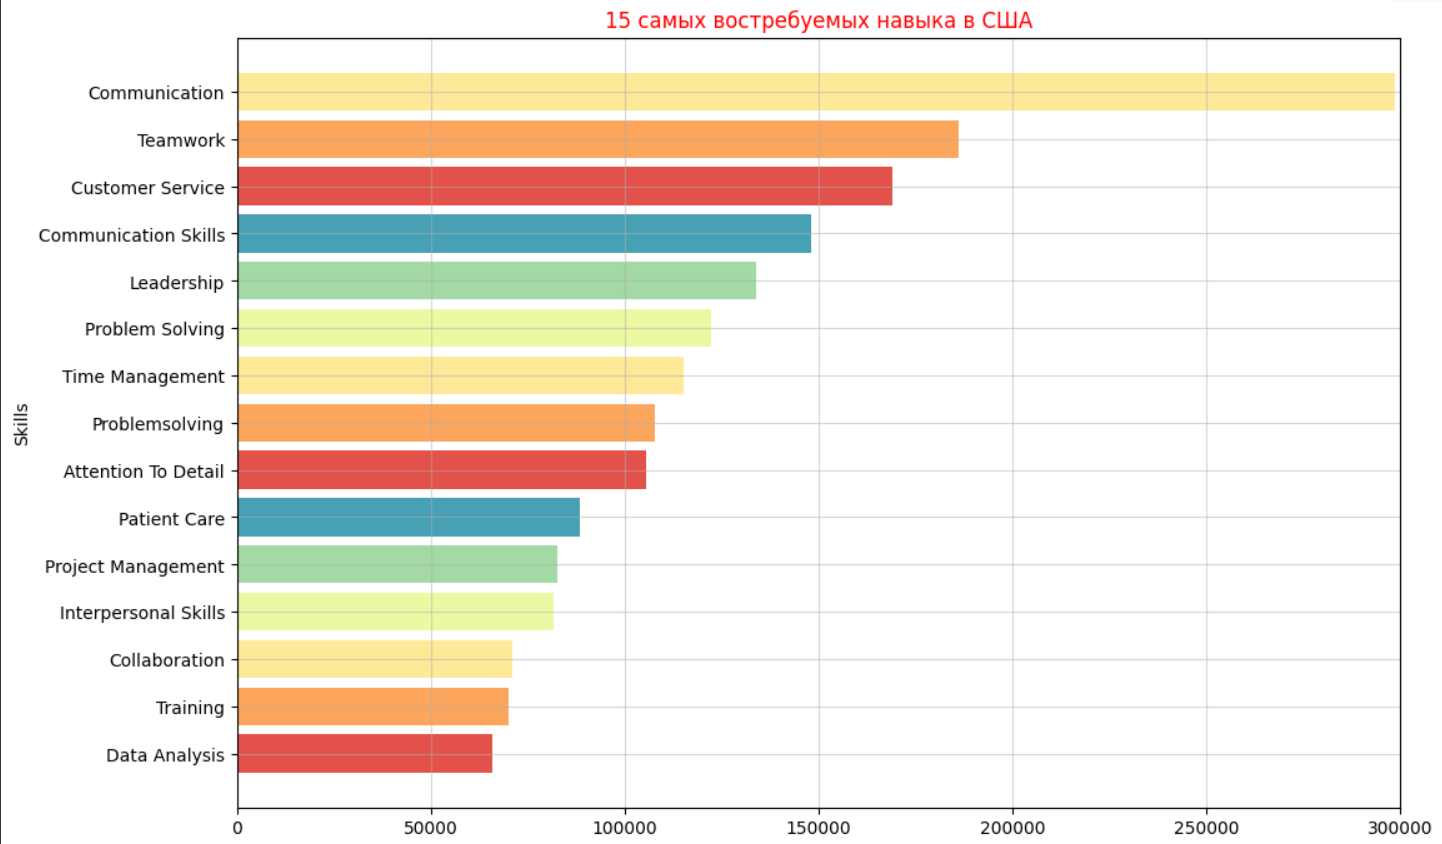


Снизу код, с помощью которого связываются значения в таблице skills и postings.

Для работы с ним достаточно менять значения в первой строчке

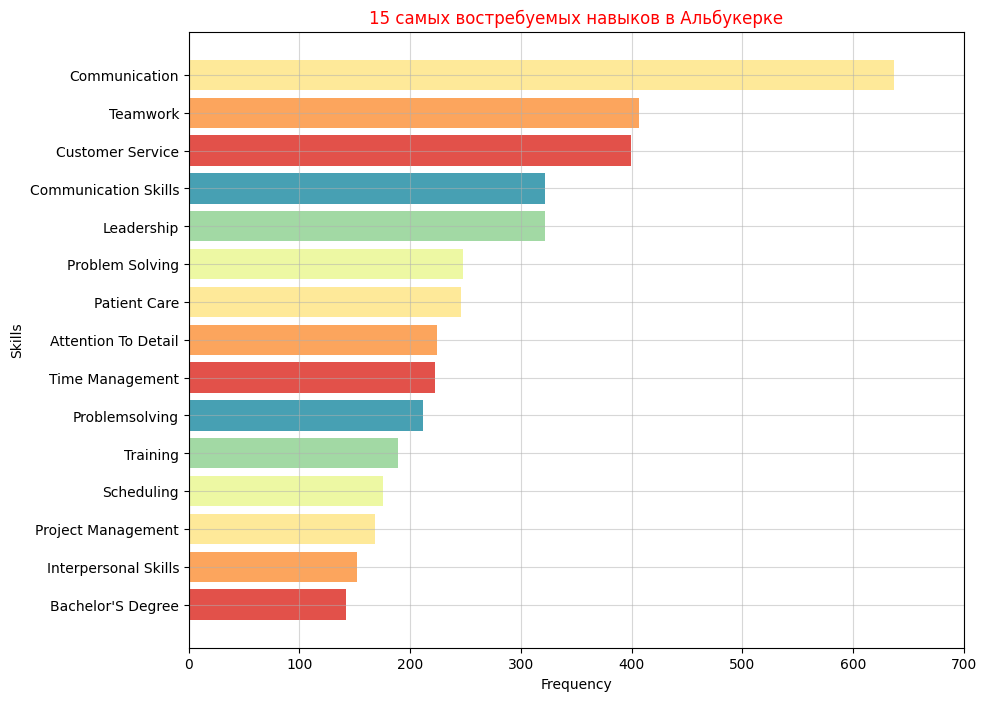

In [28]:
postings_1 = postings.loc[postings['job_location'] == 'Albuquerque, NM']
skills_df1 = linkloc(postings_1, skills_df)
skills_df1.head(5)
skills = ''
for skill in skills_df1.job_skills:
    skills += str(skill).lower()

skills = skills.split(', ')

from collections import Counter
counts = Counter(skills)
common_skills = counts.most_common(15)
common_skills
labels, values = zip(*common_skills)
labels = [label.title() for label in labels]
plt.figure(figsize=(10, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette("Spectral"))



plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.title('15 самых востребуемых навыков в Альбукерке', color='red')

plt.grid(axis='both', linestyle='-', alpha=0.5)

plt.xlim(0, 700)
plt.show()

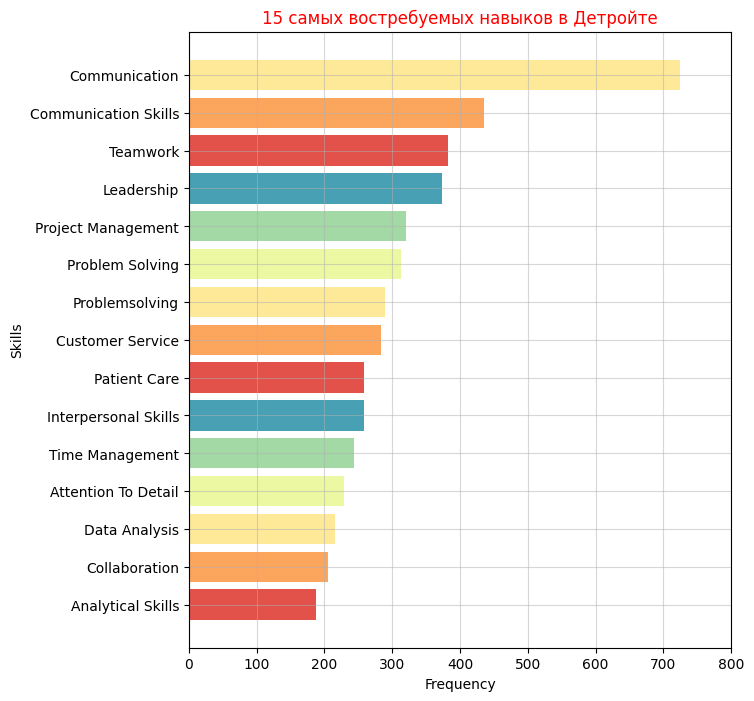

In [12]:
postings_1 = postings.loc[postings['job_location'] == 'Detroit, MI']
skills_df1 = linkloc(postings_1, skills_df)
skills_df1.head(5)
skills = ''
for skill in skills_df1.job_skills:
    skills += str(skill).lower()

skills = skills.split(', ')
skills[:10], len(skills)

from collections import Counter
counts = Counter(skills)
common_skills = counts.most_common(15)
common_skills
labels, values = zip(*common_skills)
labels = [label.title() for label in labels]
plt.figure(figsize=(7, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette("Spectral"))



plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.title('15 самых востребуемых навыков в Детройте', color='red')

plt.grid(axis='both', linestyle='-', alpha=0.5)

plt.xlim(0, 800)
plt.show()

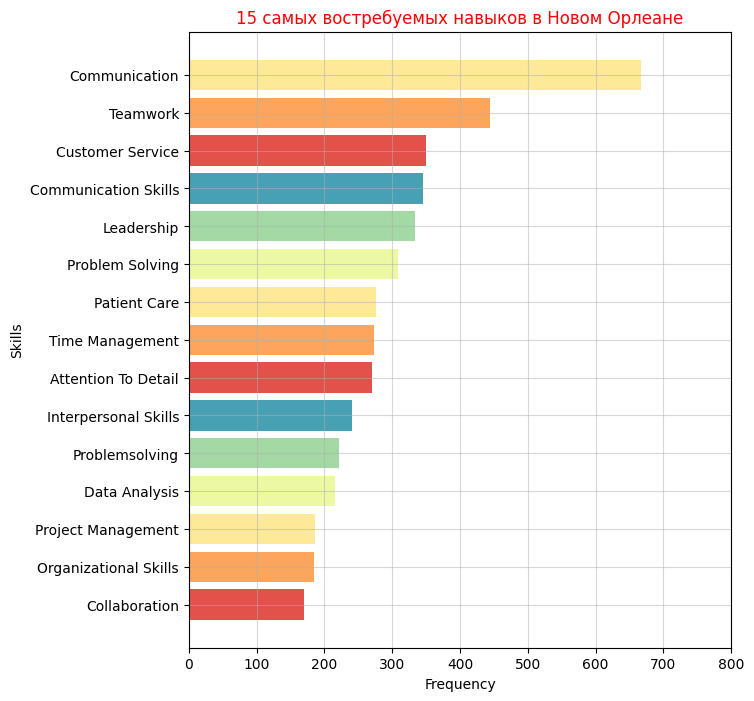

In [13]:
postings_1 = postings.loc[postings['job_location'] == 'New Orleans, LA']
skills_df1 = linkloc(postings_1, skills_df)
skills_df1.head(5)
skills = ''
for skill in skills_df1.job_skills:
    skills += str(skill).lower()

skills = skills.split(', ')
skills[:10], len(skills)

from collections import Counter
counts = Counter(skills)
common_skills = counts.most_common(15)
common_skills
labels, values = zip(*common_skills)
labels = [label.title() for label in labels]
plt.figure(figsize=(7, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette("Spectral"))



plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.title('15 самых востребуемых навыков в Новом Орлеане', color='red')

plt.grid(axis='both', linestyle='-', alpha=0.5)

plt.xlim(0, 800)
plt.show()

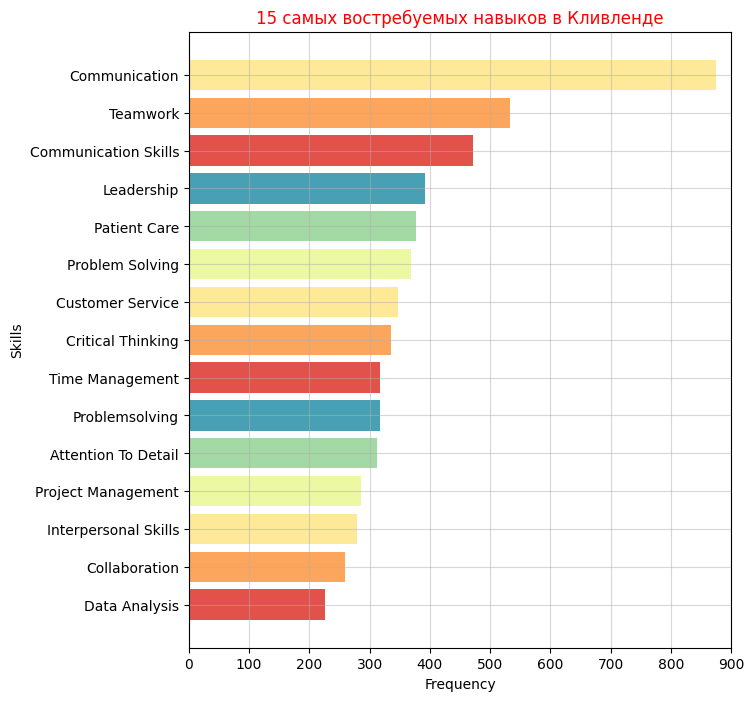

In [14]:
postings_1 = postings.loc[postings['job_location'] == 'Cleveland, OH']
skills_df1 = linkloc(postings_1, skills_df)
skills_df1.head(5)
skills = ''
for skill in skills_df1.job_skills:
    skills += str(skill).lower()

skills = skills.split(', ')
skills[:10], len(skills)

from collections import Counter
counts = Counter(skills)
common_skills = counts.most_common(15)
common_skills
labels, values = zip(*common_skills)
labels = [label.title() for label in labels]
plt.figure(figsize=(7, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette("Spectral"))


plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.title('15 самых востребуемых навыков в Кливленде', color='red')

plt.grid(axis='both', linestyle='-', alpha=0.5)

plt.xlim(0, 900)
plt.show()

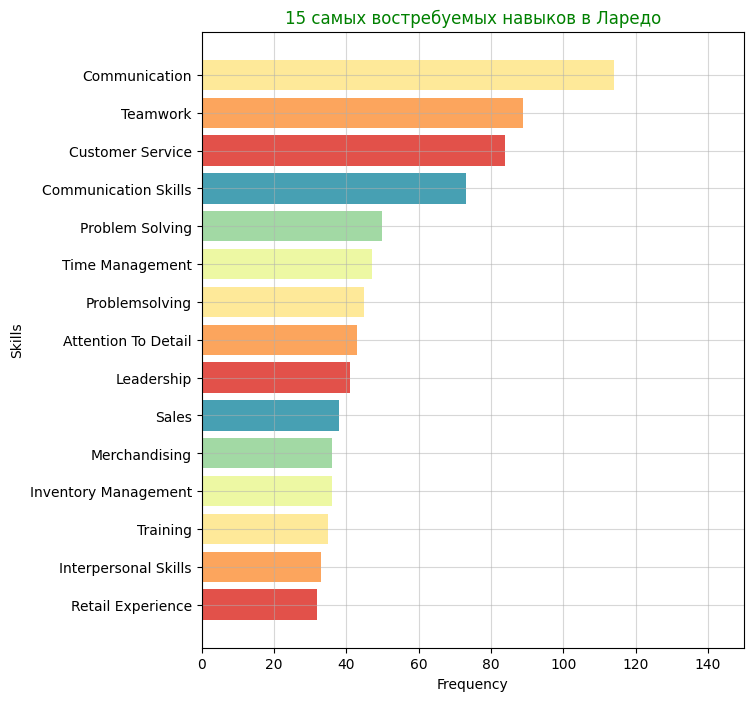

In [15]:
postings_1 = postings.loc[postings['job_location'] == 'Laredo, TX']
skills_df1 = linkloc(postings_1, skills_df)
skills_df1.head(5)
skills = ''
for skill in skills_df1.job_skills:
    skills += str(skill).lower()

skills = skills.split(', ')
skills[:10], len(skills)

from collections import Counter
counts = Counter(skills)
common_skills = counts.most_common(15)
common_skills
labels, values = zip(*common_skills)
labels = [label.title() for label in labels]
plt.figure(figsize=(7, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette("Spectral"))


plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.title('15 самых востребуемых навыков в Ларедо', color='green')

plt.grid(axis='both', linestyle='-', alpha=0.5)

plt.xlim(0, 150)
plt.show()

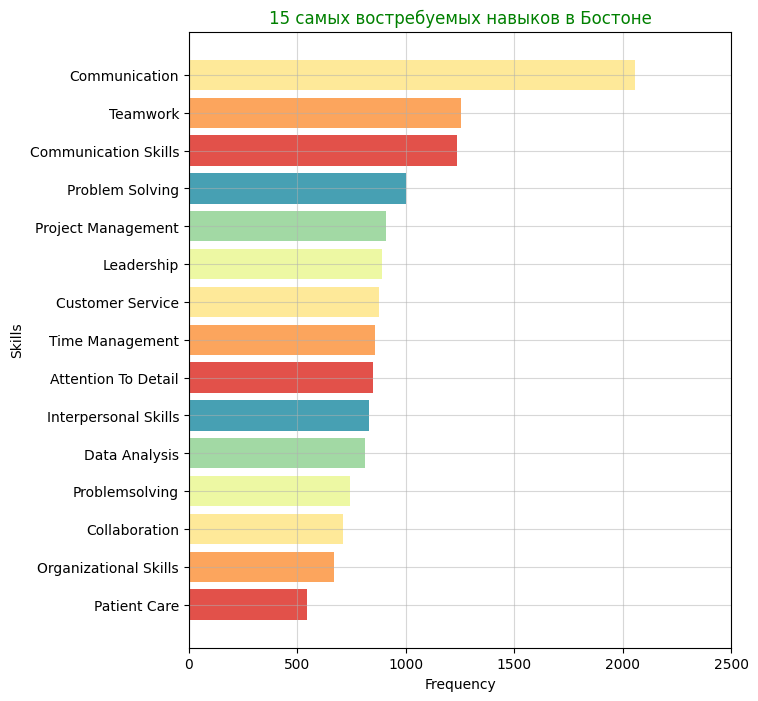

In [16]:
postings_1 = postings.loc[postings['job_location'] == 'Boston, MA']
skills_df1 = linkloc(postings_1, skills_df)
skills_df1.head(5)
skills = ''
for skill in skills_df1.job_skills:
    skills += str(skill).lower()

skills = skills.split(', ')
skills[:10], len(skills)

from collections import Counter
counts = Counter(skills)
common_skills = counts.most_common(15)
common_skills
labels, values = zip(*common_skills)
labels = [label.title() for label in labels]
plt.figure(figsize=(7, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette("Spectral"))



plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.title('15 самых востребуемых навыков в Бостоне', color='green')

plt.grid(axis='both', linestyle='-', alpha=0.5)

plt.xlim(0, 2500)
plt.show()

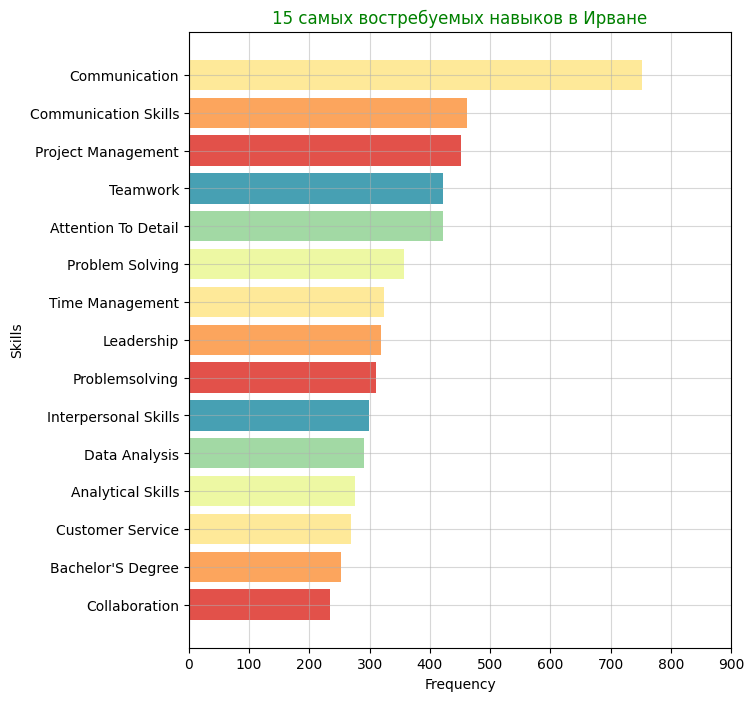

In [17]:
postings_1 = postings.loc[postings['job_location'] == 'Irvine, CA']
skills_df1 = linkloc(postings_1, skills_df)
skills_df1.head(5)
skills = ''
for skill in skills_df1.job_skills:
    skills += str(skill).lower()

skills = skills.split(', ')
skills[:10], len(skills)

from collections import Counter
counts = Counter(skills)
common_skills = counts.most_common(15)
common_skills
labels, values = zip(*common_skills)
labels = [label.title() for label in labels]
plt.figure(figsize=(7, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette("Spectral"))



plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.title('15 самых востребуемых навыков в Ирване', color='green')

plt.grid(axis='both', linestyle='-', alpha=0.5)

plt.xlim(0, 900)
plt.show()

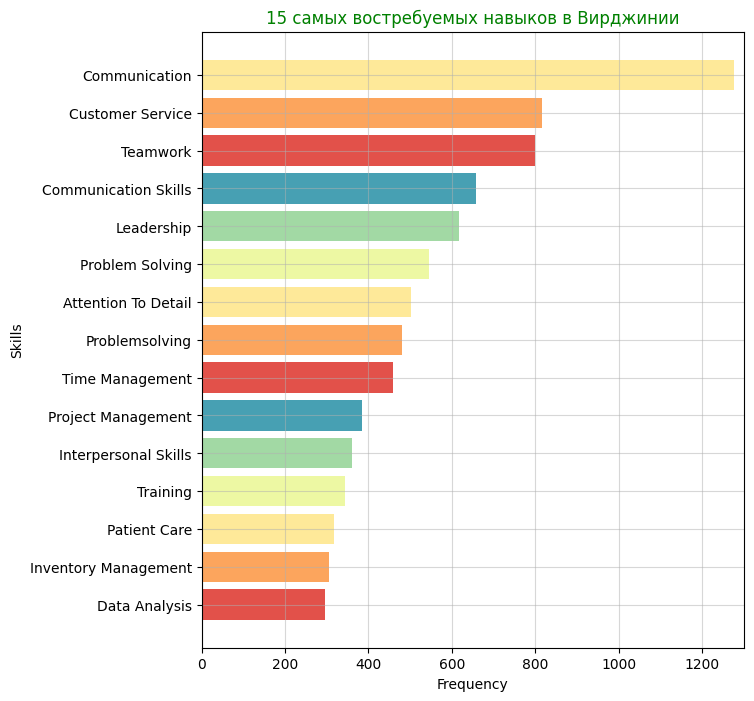

In [18]:
postings_1 = postings.loc[postings['search_city'] == 'Virginia']
skills_df1 = linkloc(postings_1, skills_df)
skills_df1.head(5)
skills = ''
for skill in skills_df1.job_skills:
    skills += str(skill).lower()

skills = skills.split(', ')
skills[:10], len(skills)

from collections import Counter
counts = Counter(skills)
common_skills = counts.most_common(15)
common_skills
labels, values = zip(*common_skills)
labels = [label.title() for label in labels]
plt.figure(figsize=(7, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette("Spectral"))



plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.title('15 самых востребуемых навыков в Вирджинии', color='green')

plt.grid(axis='both', linestyle='-', alpha=0.5)

plt.xlim(0, 1300)
plt.show()

# Диана


1)Проанализировать самые преступные города Великобритании

2) Нужно ли уметь пользоваться Microsofft office чтобы работать в microsoft

3) Где ищут работников макдональдс, сопоставить эти города, с городами с самым большим процентом ожирения в


In [19]:
postings_1 = postings.loc[postings['search_country'] == 'United Kingdom']
skills_df1 = linkloc(postings_1, skills_df)
skills_df1.head(5)
skills = ''
for skill in skills_df1.job_skills:
    skills += str(skill).lower()

skills = skills.split(', ')
skills[:10], len(skills)

from collections import Counter
counts = Counter(skills)
common_skills = counts.most_common(15)
common_skills
labels, values = zip(*common_skills)
labels = [label.title() for label in labels]
plt.figure(figsize=(12, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette("Spectral"))



plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.title('15 самых востребуемых навыков в Британии', color='red')

plt.grid(axis='both', linestyle='-', alpha=0.5)

plt.xlim(0, 50000)
plt.show()

KeyboardInterrupt: 

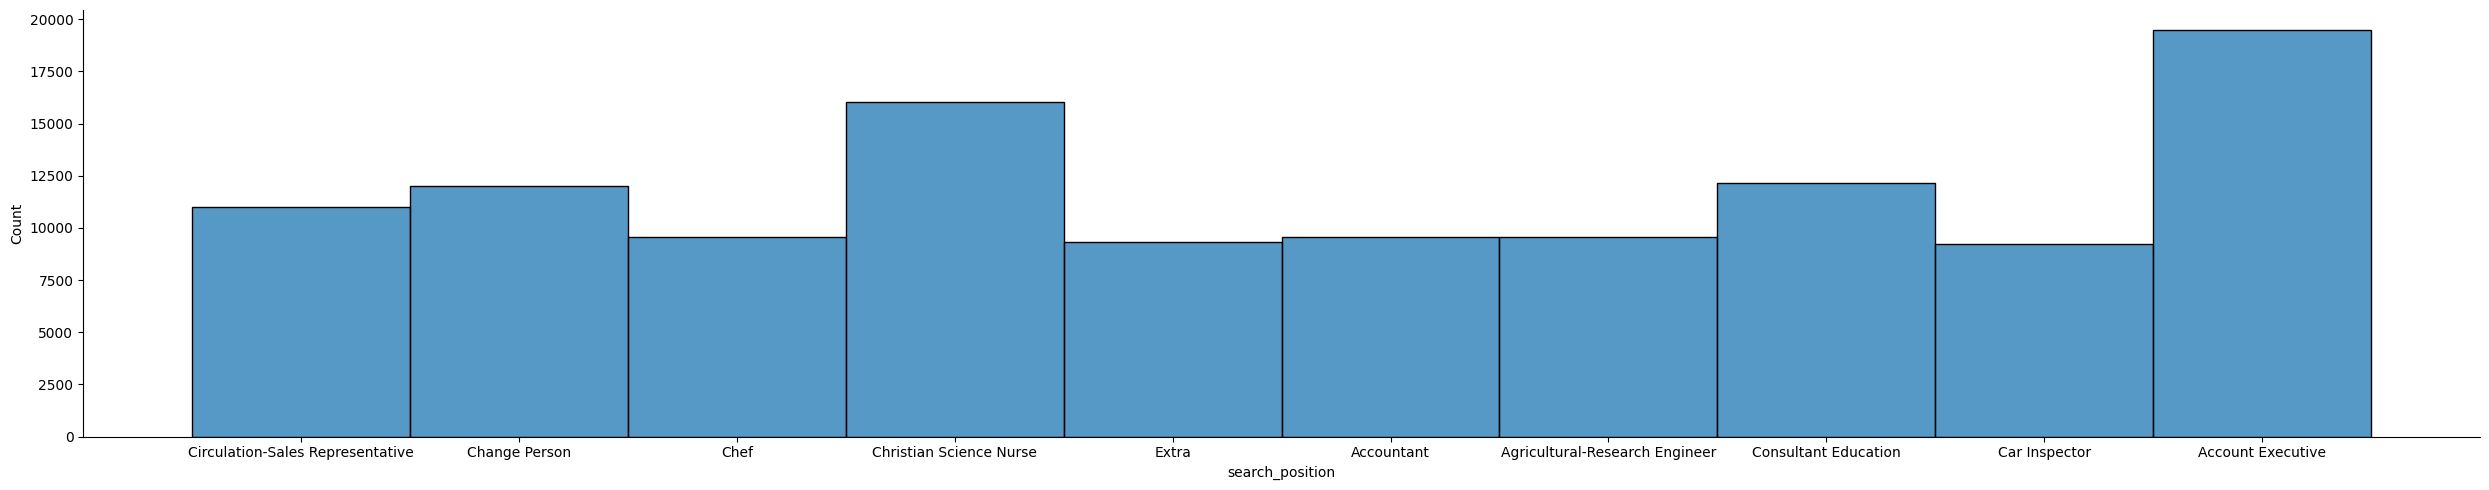

In [ ]:
postings_1 = postings[postings['search_position'].isin(postings['search_position'].value_counts()[:10].index.tolist())]
sns.displot(
    data= postings_1,
    x="search_position",
    aspect = 5,
    kind = "hist"
)
plt.show()

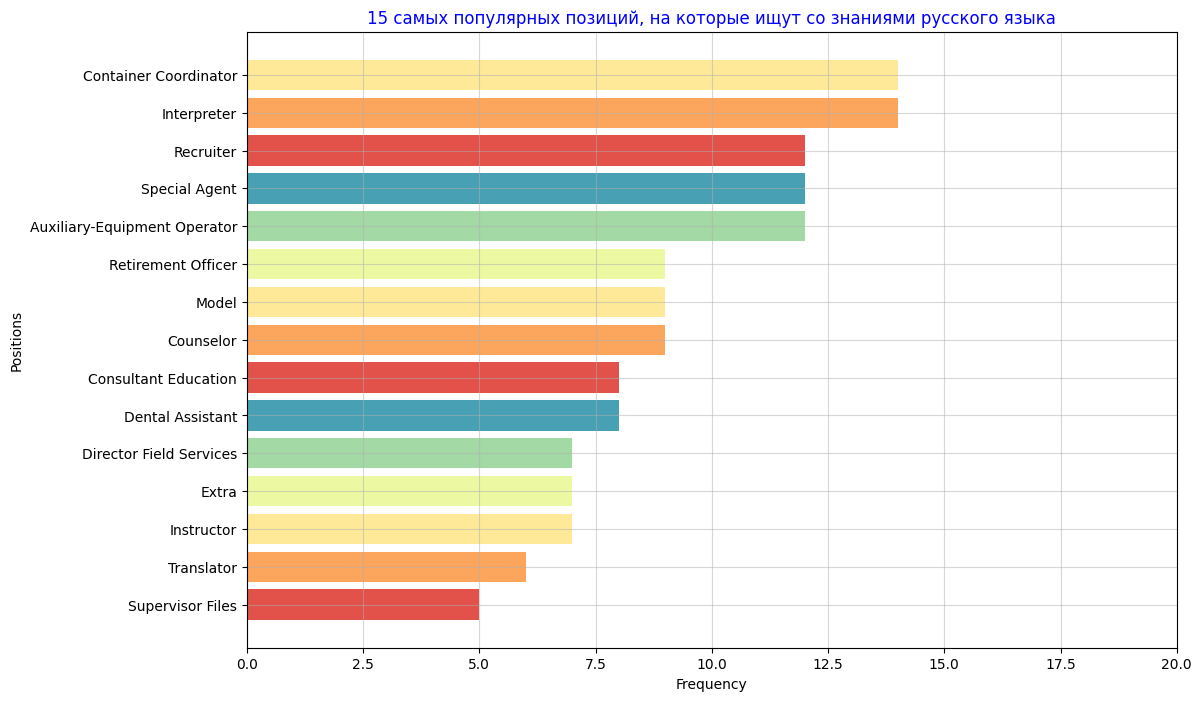

In [ ]:
skills_df1 = skills_df[skills_df['job_skills'].str.contains('Russian')==True]
postings2 = linkloc(skills_df1, postings)
postings2

skills = ''
for skill in postings2.search_position:
    skills = skills + ';' + skill

skills = skills.split(';')
skills[:10], len(skills)

from collections import Counter
counts = Counter(skills)
common_skills = counts.most_common(15)
common_skills

labels, values = zip(*common_skills)
labels = [label.title() for label in labels]
plt.figure(figsize=(12, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette("Spectral"))



plt.xlabel('Frequency')
plt.ylabel('Positions')
plt.title('15 самых популярных позиций, на которые ищут со знаниями русского языка', color='blue')

plt.grid(axis='both', linestyle='-', alpha=0.5)

plt.xlim(0, 20)
plt.show()


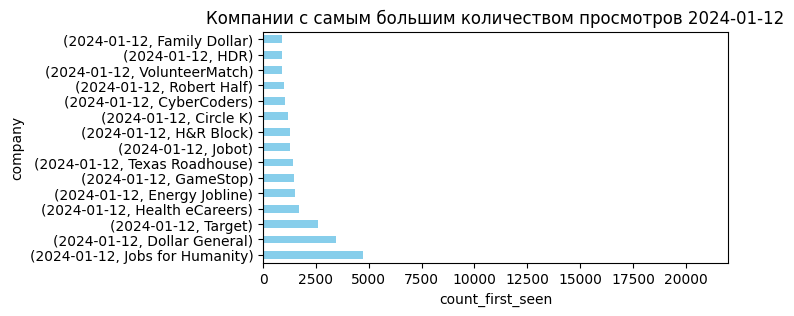

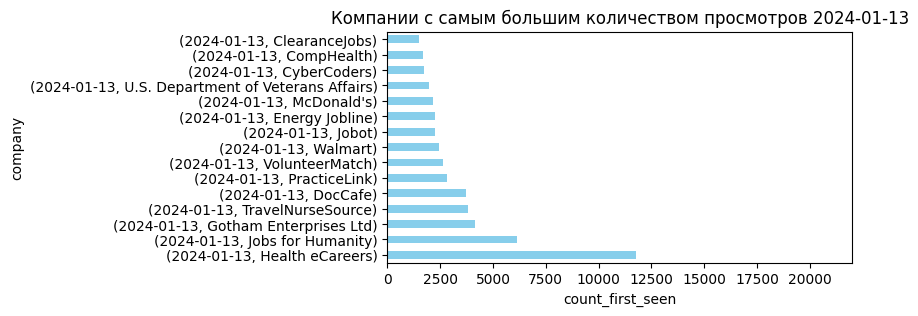

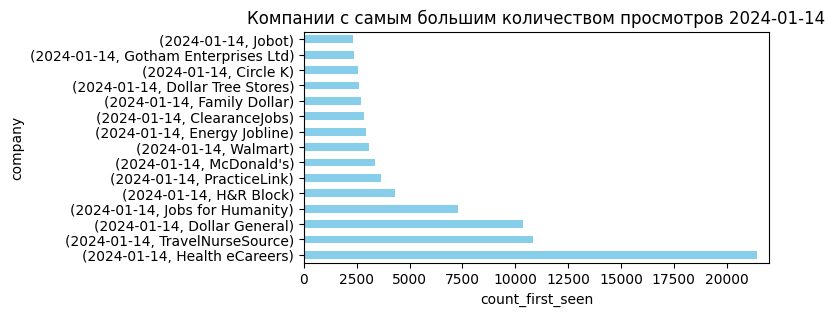

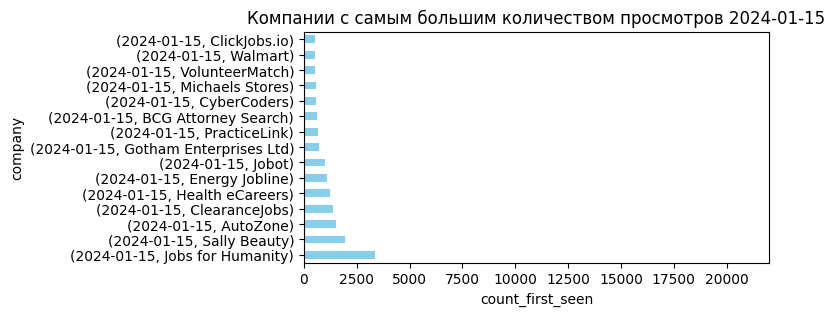

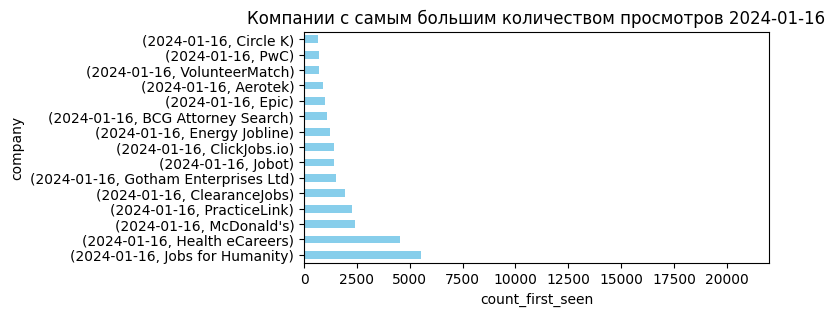

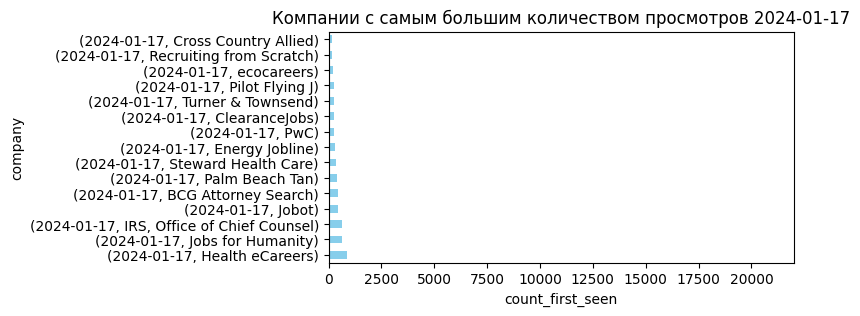

In [ ]:

array = postings.groupby('first_seen')['company'].value_counts()

# Создание таблицы с первыми 15 самыми часто посещаемыми сайтами для каждого дня
top_sites_by_day = array.groupby(level=0).nlargest(15)

# Построение отдельной горизонтальной столбчатой диаграммы для каждого дня
for day in top_sites_by_day.index.levels[0]:
    top_sites_day = top_sites_by_day.loc[day]
    plt.figure(figsize=(6, 3))
    top_sites_day.plot(kind='barh', color='skyblue')
    plt.xlabel('count_first_seen')
    plt.ylabel('company')
    plt.title(f'Компании с самым большим количеством просмотров {day}')
    plt.xlim(0, 22000)
    plt.show()

In [ ]:
postings.value_counts('search_position')[:20]

search_position
Account Executive                   19468
Christian Science Nurse             16048
Consultant Education                12138
Change Person                       12025
Circulation-Sales Representative    10978
Accountant                           9571
Chef                                 9559
Agricultural-Research Engineer       9549
Extra                                9338
Car Inspector                        9230
Dermatologist                        9031
Assembler                            8738
Bakery Supervisor                    8500
Guide                                8415
Director Social                      8319
Nurse Practitioner                   8287
Anesthesiologist                     8229
Driver                               8170
Architect                            8041
Manager Benefits                     7966
Name: count, dtype: int64

# Леша

## **7.** Проанализировать зависимость скиллов от job_type

В skills есть не мало требований, которые обозначают одно и то же, но записаны по-разному. Некоторые одинаковые скиллы я объединил в один с помощью replace.

In [ ]:
postings_1 = postings.loc[postings['job_type'] == 'Onsite']
skills_df1 = linkloc(postings_1, skills_df)

skills_df1.head(5)
skills = ''
for skill in skills_df1.job_skills:
    skill=str(skill).replace('Communication Skills','Communication').replace('Relationship Building','Communication').replace('Problemsolving','Problem Solving')
    skill=str(skill).replace('Microsoft Office Suite','Microsoft Office').replace('Collaboration','Teamwork').replace('Interpersonal Skills','Communication').replace('Salesforce','Sales')
    skill=str(skill).replace('Data Analysis','Analytical Skills').replace('Lead Generation','Leadership').replace('Customer Relationship Management','Customer Service')
    skills += skill.lower()

skills = skills.split(', ')
skills[:10], len(skills)

from collections import Counter
counts = Counter(skills)
common_skills = counts.most_common(15)
common_skills
labels, values = zip(*common_skills)
labels = [label.title() for label in labels]
plt.figure(figsize=(12, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette("Spectral"))



plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.title('15 самых востребуемых навыков для офисной работы', color='blue')

plt.grid(axis='both', linestyle='-', alpha=0.5)

plt.xlim(0, 450000)
plt.show()

KeyboardInterrupt: 

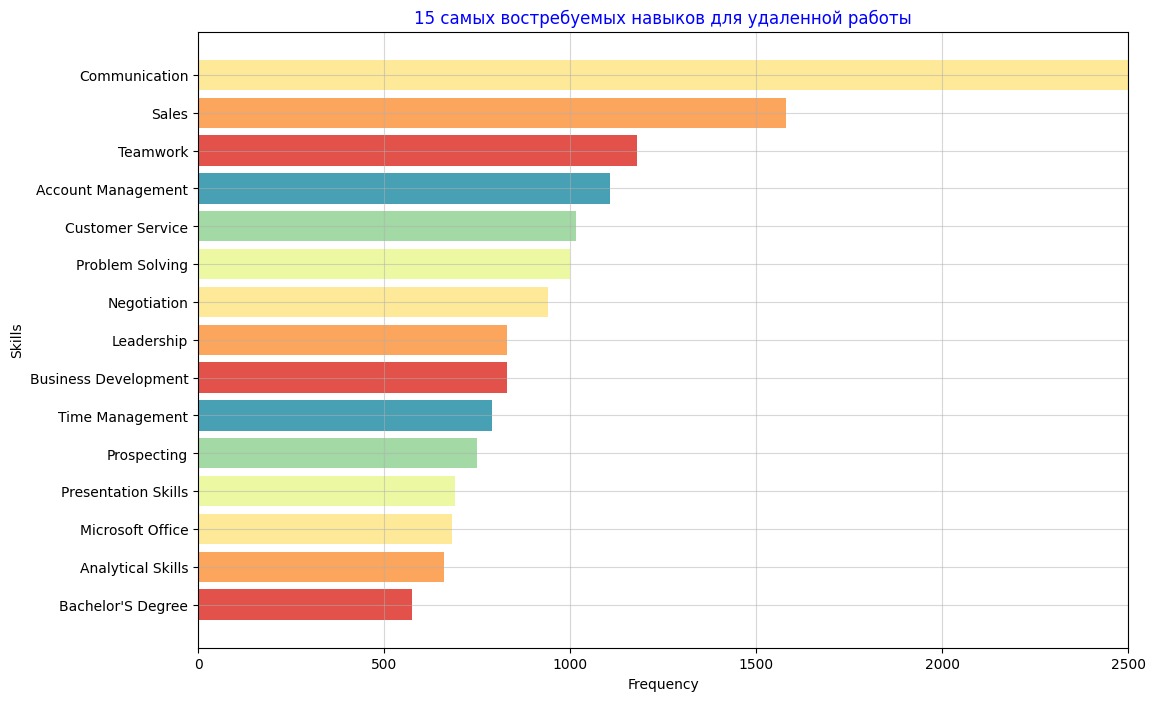

In [ ]:
postings_1 = postings.loc[postings['job_type'] == 'Remote']
skills_df1 = linkloc(postings_1, skills_df)

skills_df1.head(5)
skills = ''
for skill in skills_df1.job_skills:
    skill=str(skill).replace('Communication Skills','Communication').replace('Relationship Building','Communication').replace('Problemsolving','Problem Solving')
    skill=str(skill).replace('Microsoft Office Suite','Microsoft Office').replace('Collaboration','Teamwork').replace('Interpersonal Skills','Communication').replace('Salesforce','Sales')
    skill=str(skill).replace('Data Analysis','Analytical Skills').replace('Lead Generation','Leadership').replace('Customer Relationship Management','Customer Service')
    skills += skill.lower()

skills = skills.split(', ')
skills[:10], len(skills)

from collections import Counter
counts = Counter(skills)
common_skills = counts.most_common(15)
common_skills
labels, values = zip(*common_skills)
labels = [label.title() for label in labels]
plt.figure(figsize=(12, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette("Spectral"))



plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.title('15 самых востребуемых навыков для удаленной работы', color='blue')

plt.grid(axis='both', linestyle='-', alpha=0.5)

plt.xlim(0, 2500)
plt.show()

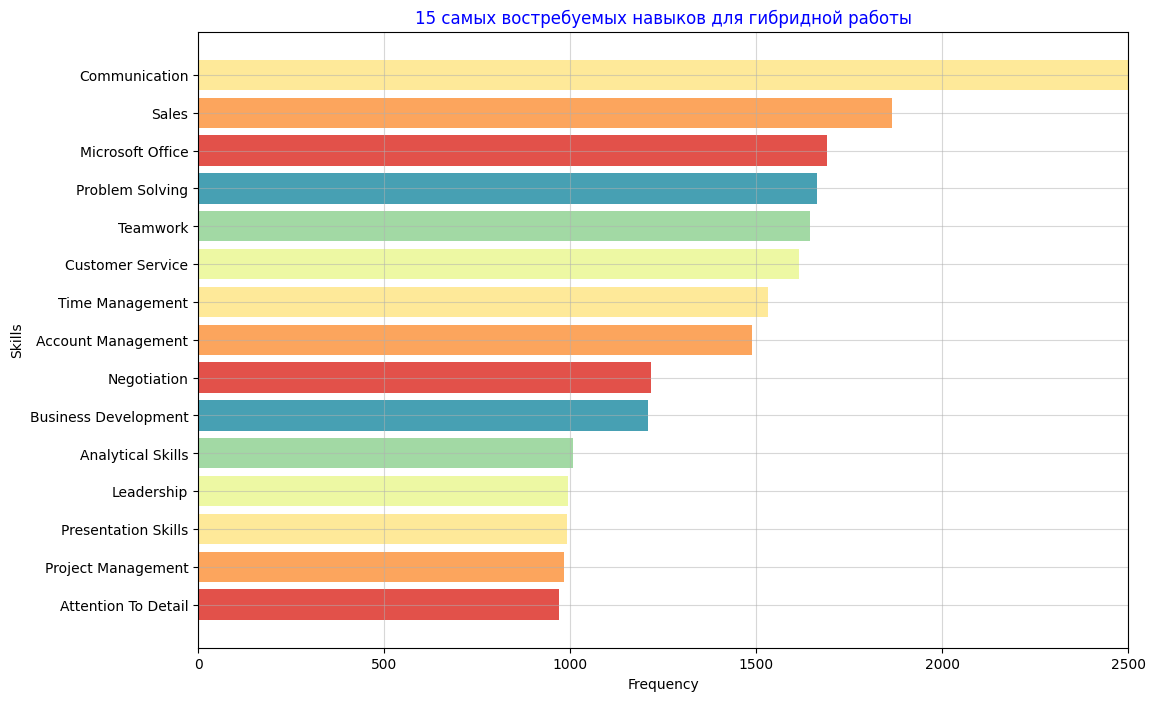

In [ ]:
postings_1 = postings.loc[postings['job_type'] == 'Hybrid']
skills_df1 = linkloc(postings_1, skills_df)

skills_df1.head(5)
skills = ''
for skill in skills_df1.job_skills:
    skill=skill.replace('Communication Skills','Communication').replace('Relationship Building','Communication').replace('Problemsolving','Problem Solving')
    skill=skill.replace('Microsoft Office Suite','Microsoft Office').replace('Collaboration','Teamwork').replace('Interpersonal Skills','Communication').replace('Salesforce','Sales')
    skill=skill.replace('Data Analysis','Analytical Skills').replace('Lead Generation','Leadership').replace('Customer Relationship Management','Customer Service')
    skills += skill.lower()

skills = skills.split(', ')
skills[:10], len(skills)

from collections import Counter
counts = Counter(skills)
common_skills = counts.most_common(15)
common_skills
labels, values = zip(*common_skills)
labels = [label.title() for label in labels]
plt.figure(figsize=(12, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette("Spectral"))



plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.title('15 самых востребуемых навыков для гибридной работы', color='blue')

plt.grid(axis='both', linestyle='-', alpha=0.5)

plt.xlim(0, 2500)
plt.show()

Вывод, основанный на этих трех графиках:
1. Везде требуются хорошие коммуникативные навыки(Communication), умение работать в команде(Teamwork) и решать различные проблемы(Problem Solving).

2. Также ценятся таймменеджмент, работа с клиентами и лидерские качества.

3. На гибридной и удаленной работе часто требуются специалисты в области бизнеса и продаж(Sales, Business Development,Negotiation).

## **5.** Вакансии с самым большим количеством требуемых навыков

In [ ]:
skills_df_copy = skills_df.copy(deep=True)

def count(row):
  return len(str(row['job_skills']).split(', '))

skills_df_copy['skills_numbers'] = skills_df_copy.apply(count, axis=1)#добавляем новый столбик, в котором хранится количество скиллов

skills_df_copy.sample(10)

,job_link,job_skills,skills_numbers
230595,https://www.linkedin.com/jobs/view/physical-th...,"Physical Therapy, Patient Care, Rehabilitation...",22
992826,https://www.linkedin.com/jobs/view/office-spec...,"High School Diploma/GED, Computer Education (K...",15
581811,https://www.linkedin.com/jobs/view/part-time-p...,"Problem Solving, Teamwork, Collaboration, Fina...",16
1107505,https://uk.linkedin.com/jobs/view/customer-ser...,"Team player, Prioritization, Communication ski...",15
238725,https://www.linkedin.com/jobs/view/x-ray-techn...,"Radiography, Radiology, Fluoroscopy, Ultrasono...",24
751647,https://www.linkedin.com/jobs/view/sr-distingu...,"Pytorch, AWS Ultraclusters, Huggingface, Light...",55
33713,https://www.linkedin.com/jobs/view/on-demand-g...,"Effective communication, Positive language, At...",21
93860,https://www.linkedin.com/jobs/view/prn-certifi...,Certified Occupational Therapy Assistant (COTA...,22
967577,https://www.linkedin.com/jobs/view/rn-full-tim...,"Registered Nurse (RN) License, Health Certific...",16
894023,https://www.linkedin.com/jobs/view/full-time-o...,"Flexible schedule, Operations Manager daily di...",51


In [ ]:
postings.search_position      #почему их больше, чем вакансий я хз, надо будет потом исправить

0                                    Color Maker
1                       Director Nursing Service
2                                       Stand-In
3                              Real-Estate Clerk
4           Supervisor Travel-Information Center
                           ...                  
1348449                         Nurse Supervisor
1348450    Assistant Construction Superintendent
1348451                                     Chef
1348452                     Occupational Analyst
1348453                               Cashier Ii
Name: search_position, Length: 1348454, dtype: object

In [ ]:
_set = set(postings.search_position)

_dict={}
for ellem in _set:
  postings_1 = postings.loc[postings['search_position'] == str(ellem)]
  skills_df1 = linkloc(postings_1, skills_df_copy)

  _dict[str(ellem)] = skills_df1['skills_numbers'].mean()

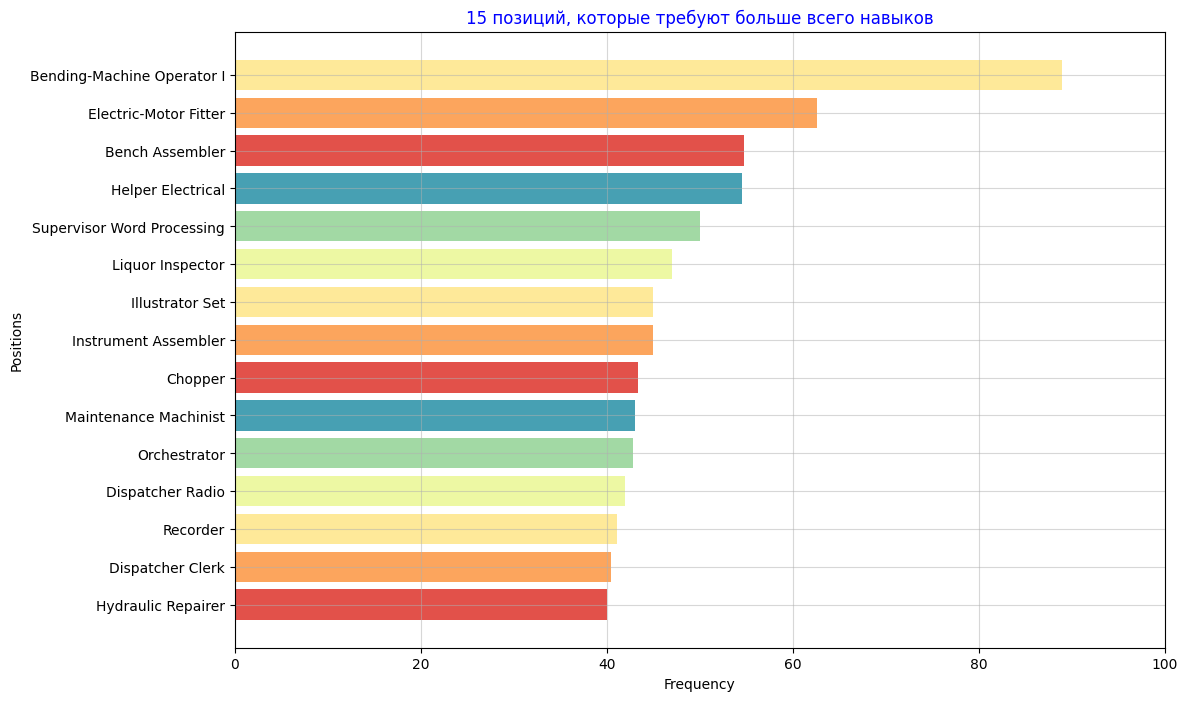

In [ ]:
from collections import Counter
counts = Counter(_dict)
common_dict = counts.most_common(15)

labels, values = zip(*common_dict)
labels = [label.title() for label in labels]
plt.figure(figsize=(12, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette("Spectral"))



plt.xlabel('Frequency')
plt.ylabel('Positions')
plt.title('15 позиций, которые требуют больше всего навыков', color='blue')

plt.grid(axis='both', linestyle='-', alpha=0.5)

plt.xlim(0, 100)
plt.show()

## **8.** Ищем главный офис для различных компаний

In [ ]:
postings.sample(10)

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
230794,https://www.linkedin.com/jobs/view/volunteer-w...,2024-01-19 09:45:09.215838+00,t,t,f,Volunteer: Walk to Cure Arthritis - Committee ...,Arthritis Foundation,"Blue Bell, PA",2024-01-12,Norristown,United States,Change Person,Associate,Onsite
229160,https://uk.linkedin.com/jobs/view/modern-workp...,2024-01-19 09:45:09.215838+00,t,t,f,Modern Workplace Specialist (United Kingdom),Numata Business IT,"Sheffield, England, United Kingdom",2024-01-12,Mansfield,United Kingdom,Change Person,Mid senior,Onsite
1280934,https://www.linkedin.com/jobs/view/sr-software...,2024-01-21 04:32:56.361385+00,t,t,f,Sr. Software Engineer,"Kaizen Approach, Inc.","Columbia, MD",2024-01-14,Clarksburg,United States,Test Fixture Designer,Mid senior,Onsite
315106,https://uk.linkedin.com/jobs/view/staff-nurse-...,2024-01-19 09:45:09.215838+00,t,t,f,Staff Nurse,Nuffield Health,"Newcastle-under-Lyme, England, United Kingdom",2024-01-12,Stoke-on-Trent,United Kingdom,Christian Science Nurse,Mid senior,Onsite
49185,https://uk.linkedin.com/jobs/view/fm-national-...,2024-01-19 13:30:52.886379+00,t,t,f,FM National Technical Manager,Omni,"Brighton, England, United Kingdom",2024-01-17,Brighton and Hove,United Kingdom,Technical Coordinator,Mid senior,Onsite
450748,https://www.linkedin.com/jobs/view/senior-san-...,2024-01-19 09:45:09.215838+00,t,t,f,Senior SAN Architect and Storage Engineer,Epic,"River Falls, WI",2024-01-13,Hastings,United States,Interior Designer,Mid senior,Onsite
1319698,https://www.linkedin.com/jobs/view/ambulatory-...,2024-01-21 06:40:01.787674+00,t,t,f,Ambulatory Psychiatrist with EvergreenHealth o...,PracticeLink,"Kirkland, WA",2024-01-16,Everett,United States,Psychiatrist,Mid senior,Onsite
389882,https://www.linkedin.com/jobs/view/controls-en...,2024-01-19 09:45:09.215838+00,t,t,f,Controls Enigneer,Fives DyAG Corp.,"Atlanta, GA",2024-01-13,Atlanta,United States,Controls Designer,Mid senior,Onsite
1080595,https://www.linkedin.com/jobs/view/lecturer-ii...,2024-01-21 17:24:55.489315+00,t,t,f,Lecturer III in Technical Communication (to st...,University of Michigan,"Ann Arbor, MI",2024-01-14,Waterloo,United States,Instructor,Mid senior,Onsite
24113,https://uk.linkedin.com/jobs/view/senior-proje...,2024-01-19 09:45:09.215838+00,t,t,f,Senior Project Manager - Real Estate,Turner & Townsend,"Leeds, England, United Kingdom",2024-01-13,Medway Towns,United Kingdom,Producer,Mid senior,Onsite


### SpaceX

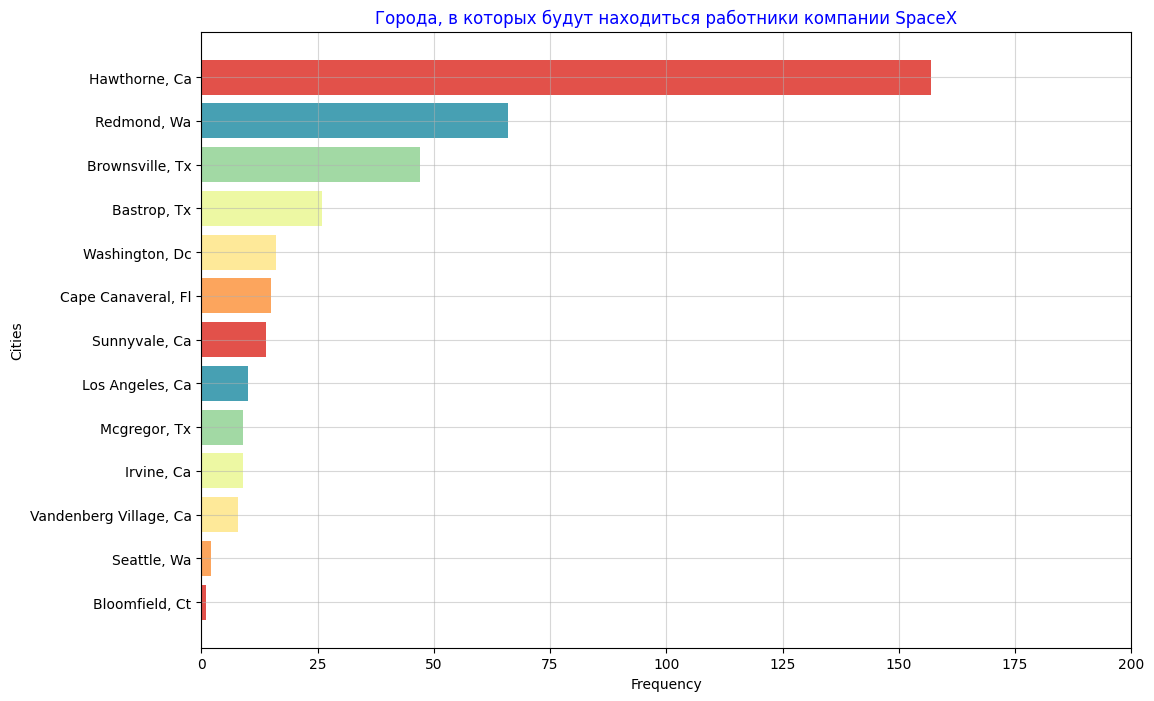

In [ ]:
postings2 = postings[postings['company'] =='SpaceX']

cities = ''
for city in postings2.job_location:
    cities = cities + ';'+ city

cities = cities.split(';')[1:]

from collections import Counter
counts = Counter(cities)
common_skills = counts.most_common(15)
common_skills
labels, values = zip(*common_skills)
labels = [label.title() for label in labels]
plt.figure(figsize=(12, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette("Spectral"))



plt.xlabel('Frequency')
plt.ylabel('Cities')
plt.title('Города, в которых будут находиться работники компании SpaceX', color='blue')

plt.grid(axis='both', linestyle='-', alpha=0.5)

plt.xlim(0, 200)
plt.show()

Отсюда можно сделать вывод, что главный офис компании SpaceX находится в Hawthorne. Также у компании есть не мало рабочих мест в других городах штата Калифорния, и в других штатах, таких как Вашингтон и Техас.

### Walmart USA

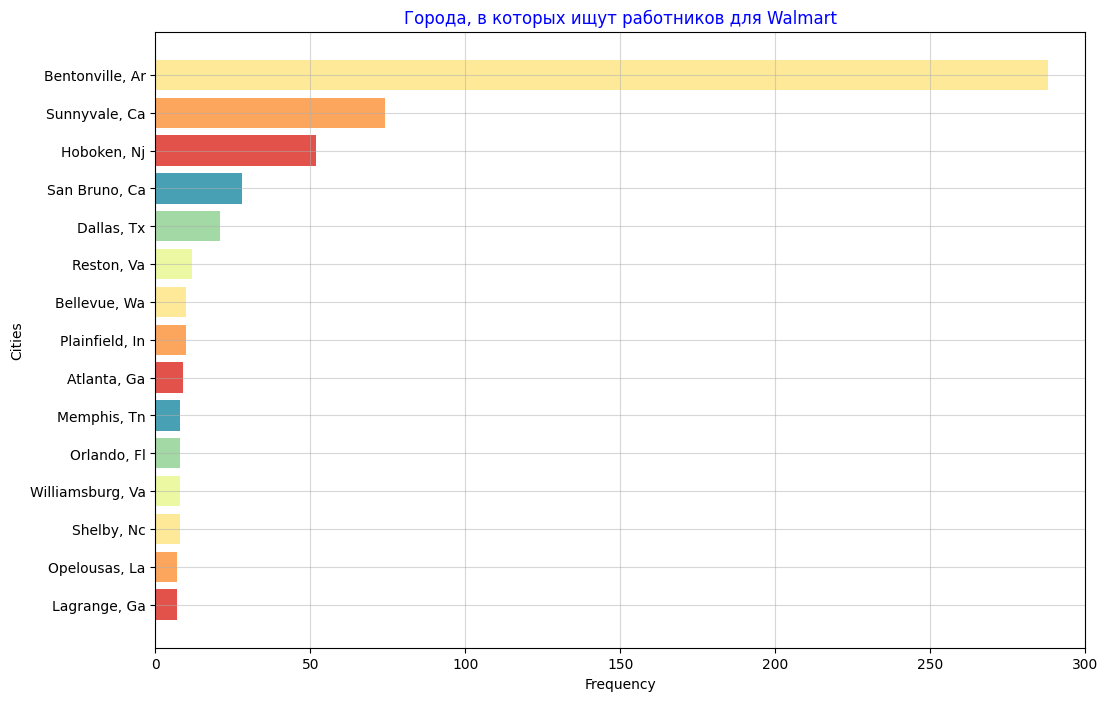

In [ ]:
postings2 = postings[(postings['company'] =='Walmart') & (postings['search_country'] =='United States')]

cities = ''
for city in postings2.job_location:
    cities = cities + ';'+ city

cities = cities.split(';')[1:]

from collections import Counter
counts = Counter(cities)
common_skills = counts.most_common(15)
common_skills
labels, values = zip(*common_skills)
labels = [label.title() for label in labels]
plt.figure(figsize=(12, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette("Spectral"))



plt.xlabel('Frequency')
plt.ylabel('Cities')
plt.title('Города, в которых будут находиться работники компании Walmart', color='blue')

plt.grid(axis='both', linestyle='-', alpha=0.5)

plt.xlim(0, 300)
plt.show()

Главный офис находится в Bentonville

### Amazon

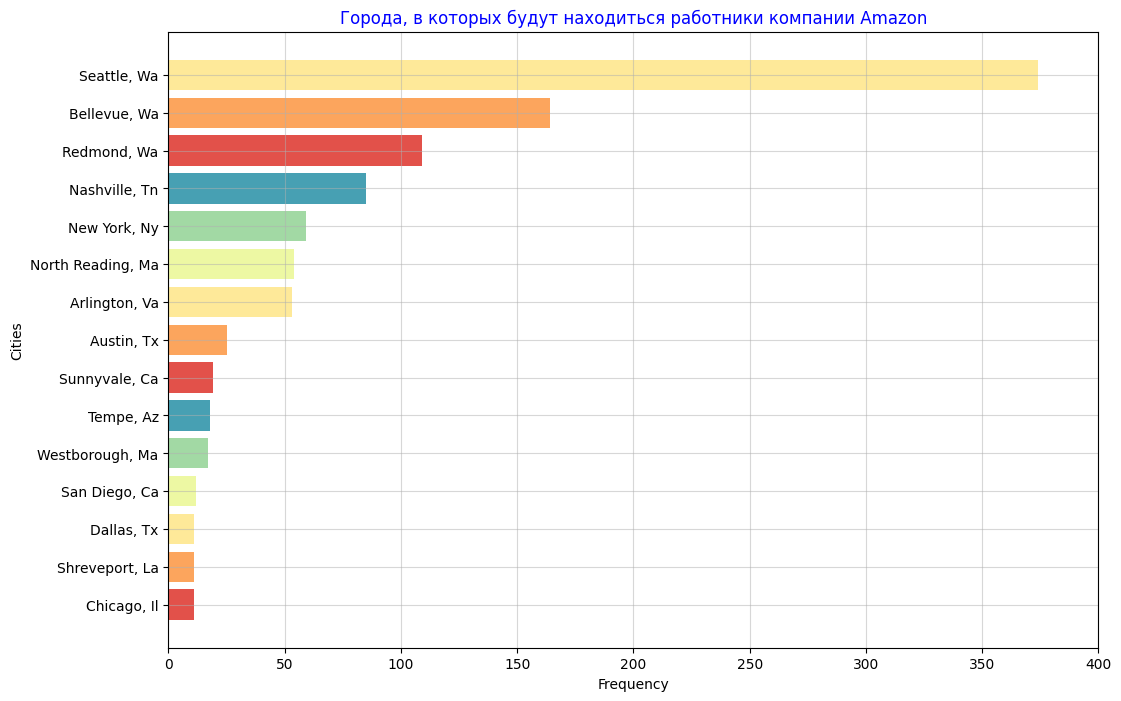

In [ ]:
postings2 = postings[(postings['company'] =="Amazon") & (postings['search_country'] =='United States')]

cities = ''
for city in postings2.job_location:
    cities = cities + ';'+ city

cities = cities.split(';')[1:]

from collections import Counter
counts = Counter(cities)
common_skills = counts.most_common(15)
common_skills
labels, values = zip(*common_skills)
labels = [label.title() for label in labels]
plt.figure(figsize=(12, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette("Spectral"))



plt.xlabel('Frequency')
plt.ylabel('Cities')
plt.title('Города, в которых будут находиться работники компании Amazon', color='blue')

plt.grid(axis='both', linestyle='-', alpha=0.5)

plt.xlim(0, 400)
plt.show()

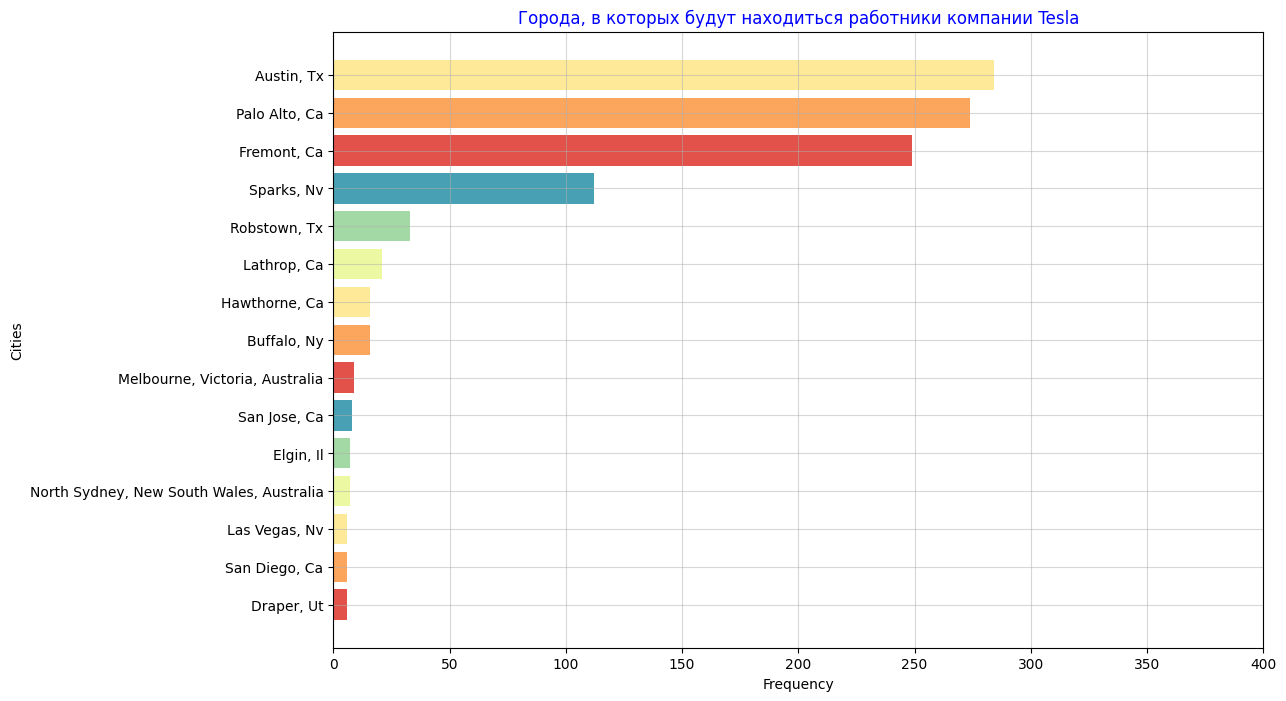

In [ ]:
postings2 = postings[(postings['company'] =="Tesla")]

cities = ''
for city in postings2.job_location:
    cities = str(cities) + ';'+ str(city)

cities = cities.split(';')[1:]

from collections import Counter
counts = Counter(cities)
common_skills = counts.most_common(15)
common_skills
labels, values = zip(*common_skills)
labels = [label.title() for label in labels]
plt.figure(figsize=(12, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette("Spectral"))



plt.xlabel('Frequency')
plt.ylabel('Cities')
plt.title('Города, в которых будут находиться работники компании Tesla', color='blue')

plt.grid(axis='both', linestyle='-', alpha=0.5)

plt.xlim(0, 400)
plt.show()

А тут главный офис в Seattle